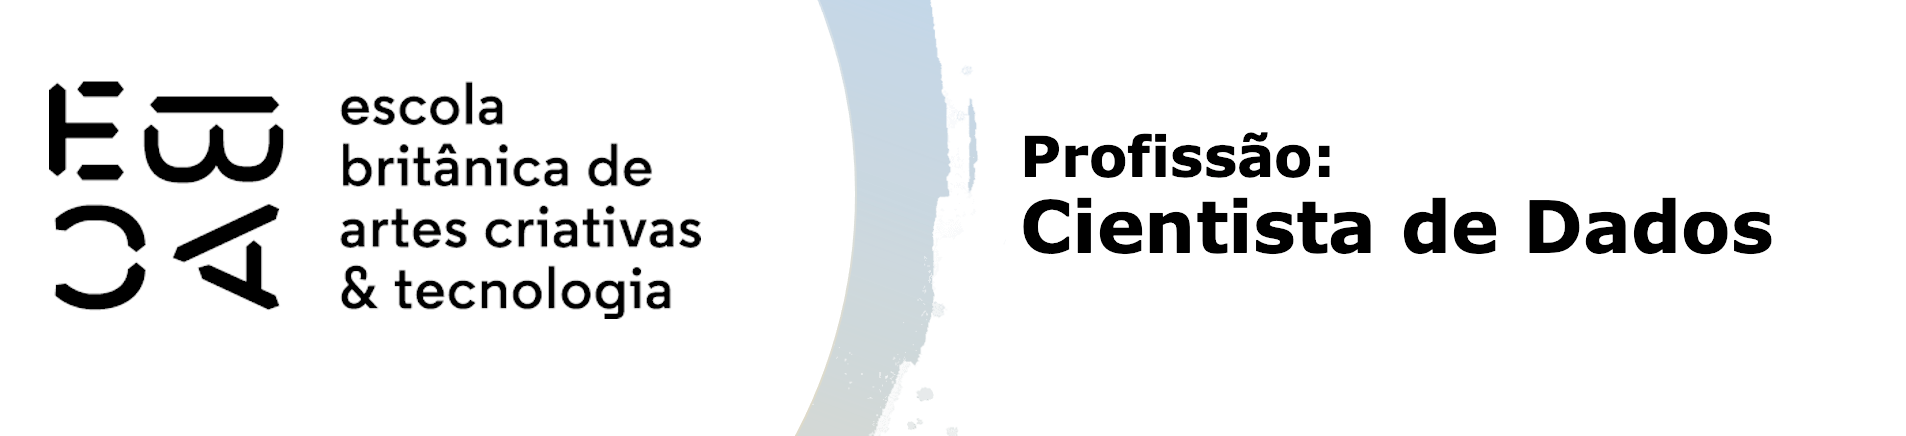

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
#baixar base

peng = sns.load_dataset('penguins')
peng.index.name='id'
peng = peng.dropna()
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [3]:
#selecionar as variáveis quantitativas da base e eliminar valores faltantes

peng_num = peng.select_dtypes('number').dropna()
peng_num.isna().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [4]:
#padronizar as variáveis

padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

peng_pad = pd.DataFrame(peng_pad)
peng_pad

,0,1,2,3
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852
...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957
329,0.514098,-1.457000,1.002739,0.799674
330,1.173384,-0.744994,1.502928,1.919069
331,0.221082,-1.202712,0.788372,1.234995


In [5]:
#agrupamento hierárquico dividindo essa base em 3 grupos

#cria uma instância do modelo de clustering AgglomerativeClustering com os parâmetros desejados
clus = AgglomerativeClustering(linkage= 'complete',
                               distance_threshold= None,
                               n_clusters= 3)

#aplica o modelo de clustering aos dados padronizados 
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [6]:
#cria coluna no df original para colocar os grupos que o modelo classificou
peng_num['grupo1'] = clus.labels_
peng_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo1
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0
340,46.8,14.3,215.0,4850.0,0
341,50.4,15.7,222.0,5750.0,0


In [22]:
peng_pad['grupo1'] = clus.labels_
peng_pad

,0,1,2,3,grupo1
0,-0.896042,0.780732,-1.426752,-0.568475,1
1,-0.822788,0.119584,-1.069474,-0.506286,1
2,-0.676280,0.424729,-0.426373,-1.190361,1
3,-1.335566,1.085877,-0.569284,-0.941606,1
4,-0.859415,1.747026,-0.783651,-0.692852,1
...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,0
329,0.514098,-1.457000,1.002739,0.799674,0
330,1.173384,-0.744994,1.502928,1.919069,0
331,0.221082,-1.202712,0.788372,1.234995,0


In [7]:
peng = peng.merge(peng_num['grupo1'], how='left', on='id')
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo1
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0


Text(0, 0.5, 'Distância')

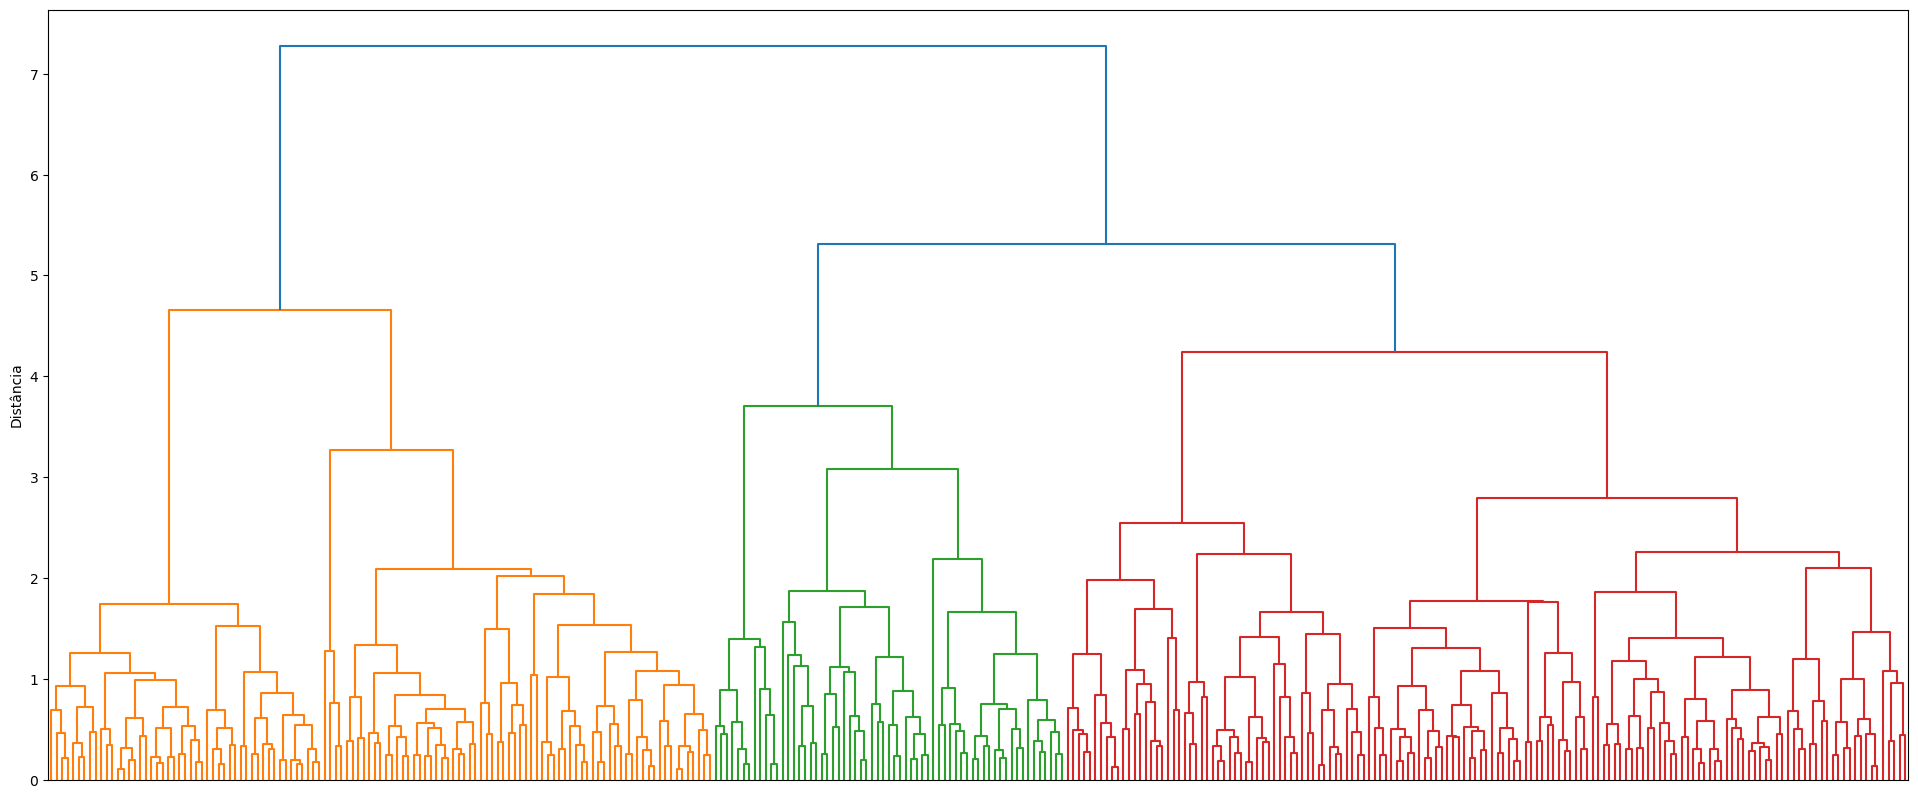

In [8]:
#Dendrograma

plt.figure(figsize=(24, 10)) 

dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))
plt.xticks([]) #retirar marcadores de x para melhorar figura
plt.ylabel('Distância')

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [20]:
print('Quantos pinguins de cada espécie há em cada grupo?\n')

tabela_cruzada = pd.crosstab(peng['species'], peng['grupo1'])
tabela_cruzada

Quantos pinguins de cada espécie há em cada grupo?



grupo1,0,1,2
species,,,
Adelie,0,145,1
Chinstrap,0,6,62
Gentoo,119,0,0


[Text(0, 0, 'bill_length_mm'),
 Text(1, 0, 'bill_depth_mm'),
 Text(2, 0, 'flipper_length_mm'),
 Text(3, 0, 'body_mass_g')]

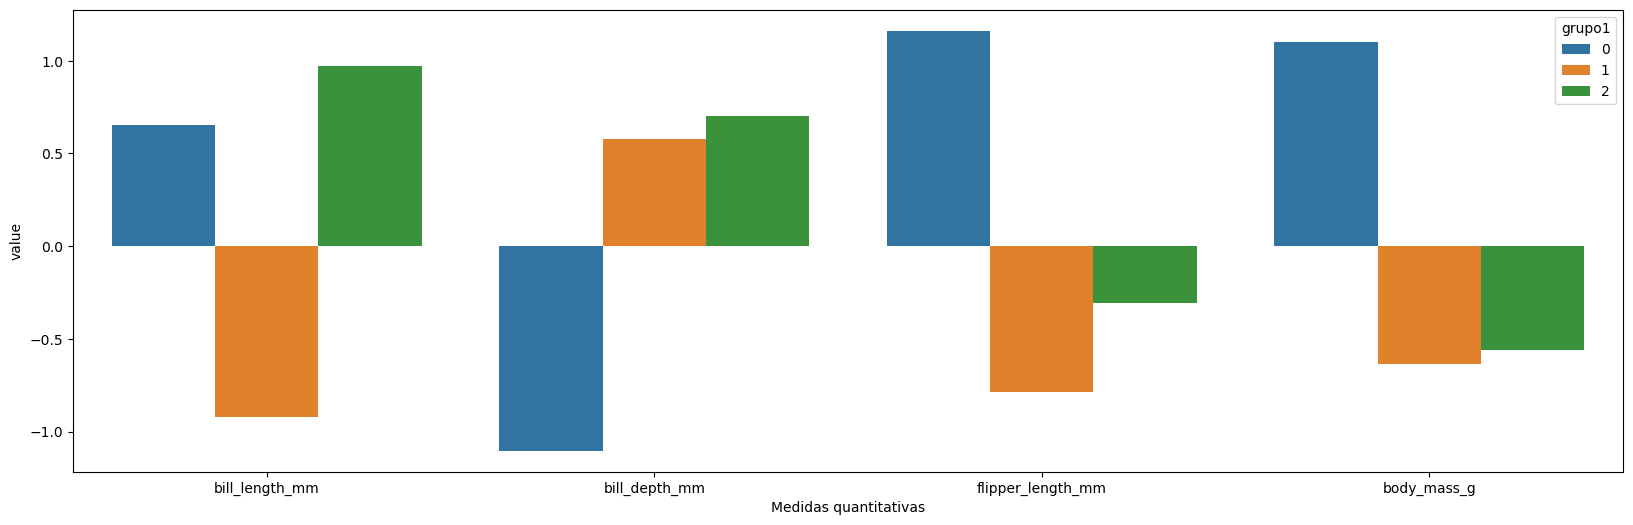

In [25]:
#df com médias das variáveis quantitativas por grupo de classificação
df = peng_pad.groupby('grupo1').mean().reset_index()

#plotar gráfico sem massa
plt.figure(figsize=(20, 6))

fig = sns.barplot(data=df.melt(id_vars='grupo1'), x='variable', y='value', hue='grupo1')
fig.set_xlabel('Medidas quantitativas')
fig.set_xticklabels(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

- É possível observar que o grupo 0 é o que apresenta melhor separação dos demais e está corretamente agrupado como Gentoo.
- Os grupos 1 e 2 se confundem um pouco, principalmente em `bill_depth_mm` e `body_mass_g`, o que justifica a espécie Chinstrap estar dividida entre esses dois grupos.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [26]:
#agrupamento hierárquico dividindo essa base em 5 grupos

#cria uma instância do modelo de clustering AgglomerativeClustering com os parâmetros desejados
clus1 = AgglomerativeClustering(linkage= 'complete',
                                distance_threshold= None,
                                n_clusters= 5)

#aplica o modelo de clustering aos dados padronizados 
clus1.fit(peng_pad.drop(columns='grupo1'))

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [27]:
#cria coluna no df original para colocar os grupos que o modelo classificou
peng_num['grupo2'] = clus1.labels_
peng_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo1,grupo2
id,,,,,,
0,39.1,18.7,181.0,3750.0,1,2
1,39.5,17.4,186.0,3800.0,1,2
2,40.3,18.0,195.0,3250.0,1,2
4,36.7,19.3,193.0,3450.0,1,2
5,39.3,20.6,190.0,3650.0,1,4
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,3
340,46.8,14.3,215.0,4850.0,0,3
341,50.4,15.7,222.0,5750.0,0,1


In [28]:
peng_pad['grupo2'] = clus1.labels_
peng_pad

,0,1,2,3,grupo1,grupo2
0,-0.896042,0.780732,-1.426752,-0.568475,1,2
1,-0.822788,0.119584,-1.069474,-0.506286,1,2
2,-0.676280,0.424729,-0.426373,-1.190361,1,2
3,-1.335566,1.085877,-0.569284,-0.941606,1,2
4,-0.859415,1.747026,-0.783651,-0.692852,1,4
...,...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,0,3
329,0.514098,-1.457000,1.002739,0.799674,0,3
330,1.173384,-0.744994,1.502928,1.919069,0,1
331,0.221082,-1.202712,0.788372,1.234995,0,3


In [29]:
peng = peng.merge(peng_num['grupo2'], how='left', on='id')
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo1,grupo2
id,,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,2
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,4
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0,3
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0,3
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0,1


In [30]:
print('Quantos pinguins de cada espécie há em cada grupo?\n')

tabela_cruzada2 = pd.crosstab(peng['species'], peng['grupo2'])
tabela_cruzada2

Quantos pinguins de cada espécie há em cada grupo?



grupo2,0,1,2,3,4
species,,,,,
Adelie,1,0,92,0,53
Chinstrap,62,0,5,0,1
Gentoo,0,70,0,49,0


> Chinstrap e Adelie continuam se confundindo um pouco, apesar de estarem melhor separados que antes - porém Adelie se separou em dois grupos. Gentoo, que antes estava todo em um único grupo, agora foi dividido em 2 grupos.

In [43]:
print('Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?\n')

df = peng.groupby(['sex', 'grupo2', 'species']).count().unstack()
df[['island']]

Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?



island                 
species       Adelie Chinstrap Gentoo
sex    grupo2                        
Female 0         NaN      28.0    NaN
       1         NaN       NaN    9.0
       2        72.0       5.0    NaN
       3         NaN       NaN   49.0
       4         1.0       1.0    NaN
Male   0         1.0      34.0    NaN
       1         NaN       NaN   61.0
       2        20.0       NaN    NaN
       4        52.0       NaN    NaN

##### Distribuição de pinguins por grupo - avaliando sexo e espécie

| Grupos | Espécie        | Sexo            |
|----------|----------|----------|
| 0      | Chinstrap      | Machos e fêmeas |
| 1      | Gentoo         | Maioria machos  |
| 2      | Maioria Adelie | Maioria fêmeas  |
| 3      | Gentoo         | Fêmeas          |
| 4      | Maioria Adelie | Maioria machos  |

#### Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

Sim, uma vez que a divisão da espécie Gentoo foi feita praticamente baseada no sexo dessa espécie, assim como no caso da Adelie. 